In [1]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D

Using TensorFlow backend.


In [2]:
input_shape = (32, 32, 1)
model = Sequential()
model.add(Conv2D(6, kernel_size=(5, 5),
                 activation='relu',
                 input_shape=input_shape, name='CONV1'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2),name='POOL1'))
model.add(Conv2D(16, kernel_size=(5, 5),
                 activation='relu',
                 input_shape=input_shape, name='CONV2'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2),name='POOL2'))
model.add(Flatten(name='Flatten'))
model.add(Dense(120, activation='relu', name='FC3'))
model.add(Dense(84, activation='relu', name='FC4'))
model.add(Dense(10, activation='softmax', name='FC5'))



#model.add(Dropout(0.25))
#model.add(Flatten())
#model.add(Dense(128, activation='relu'))
#model.add(Dropout(0.5))
#model.add(Dense(num_classes, activation='softmax'))

In [3]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
CONV1 (Conv2D)               (None, 28, 28, 6)         156       
_________________________________________________________________
POOL1 (MaxPooling2D)         (None, 14, 14, 6)         0         
_________________________________________________________________
CONV2 (Conv2D)               (None, 10, 10, 16)        2416      
_________________________________________________________________
POOL2 (MaxPooling2D)         (None, 5, 5, 16)          0         
_________________________________________________________________
Flatten (Flatten)            (None, 400)               0         
_________________________________________________________________
FC3 (Dense)                  (None, 120)               48120     
_________________________________________________________________
FC4 (Dense)                  (None, 84)               

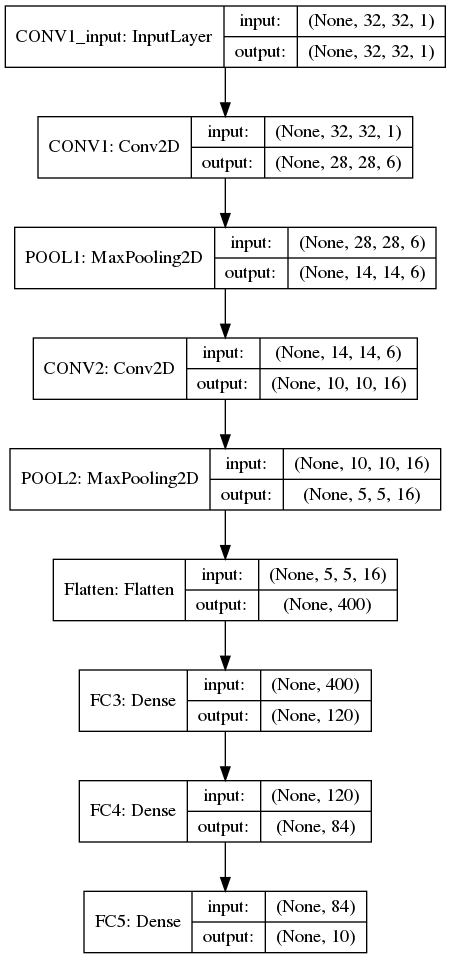

In [4]:
from keras.utils import plot_model
plot_model(model,show_layer_names=True, show_shapes=True, to_file='model.png',rankdir='TB')

In [5]:
from keras.datasets import mnist
import keras

In [6]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

num_classes = 10

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

60000 train samples
10000 test samples


In [7]:
x_train[0].reshape(28, 28)

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [8]:
# Now, MNIST is size 28, 28. LeNet is size: 32, 32 input. Let us pad the inputs.

In [9]:
from keras import backend as K


In [10]:
img_rows, img_cols = 28, 28


In [311]:
if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)
    
model = Sequential()
model.add(Conv2D(36, kernel_size=(5, 5),
                 activation='relu',
                 input_shape=input_shape, name='CONV1'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2),name='POOL1'))
model.add(Conv2D(64, kernel_size=(5, 5),
                 activation='relu',
                 input_shape=input_shape, name='CONV2'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2),name='POOL2'))
model.add(Flatten(name='Flatten'))
model.add(Dense(120, activation='relu', name='FC3'))
model.add(Dense(84, activation='relu', name='FC4'))
model.add(Dense(num_classes, activation='softmax', name='FC5'))


In [312]:
input_shape

(28, 28, 1)

In [313]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
CONV1 (Conv2D)               (None, 24, 24, 36)        936       
_________________________________________________________________
POOL1 (MaxPooling2D)         (None, 12, 12, 36)        0         
_________________________________________________________________
CONV2 (Conv2D)               (None, 8, 8, 64)          57664     
_________________________________________________________________
POOL2 (MaxPooling2D)         (None, 4, 4, 64)          0         
_________________________________________________________________
Flatten (Flatten)            (None, 1024)              0         
_________________________________________________________________
FC3 (Dense)                  (None, 120)               123000    
_________________________________________________________________
FC4 (Dense)                  (None, 84)               

In [314]:
from keras.optimizers import RMSprop

model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

In [315]:
batch_size=128
epochs=2
history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/2
60000/60000 [==============================] - 25s 410us/step - loss: 0.1920 - accuracy: 0.9386 - val_loss: 0.0440 - val_accuracy: 0.9872
Epoch 2/2
60000/60000 [==============================] - 25s 409us/step - loss: 0.0457 - accuracy: 0.9863 - val_loss: 0.0421 - val_accuracy: 0.9851


In [367]:
weights = model.layers[2].get_weights()[0]

In [369]:
# our 6 x 6 filters of size 28 x 28, with a 5px margin in between
margin = 2
img_width = 5
img_height = 5
width = n * img_width + (n - 1) * margin
height = n * img_height + (n - 1) * margin
stitched_filters = np.zeros((width, height, 1))
n=8
# fill the picture with our saved filters
for i in range(n):
    for j in range(n):
        img = weights[:, :, 2, i * n + j]
        stitched_filters[(img_width + margin) * i: (img_width + margin) * i + img_width,
                         (img_height + margin) * j: (img_height + margin) * j + img_height, :] = img = deprocess_image(img.reshape(5, 5, 1))

# save the result to disk
imageio.imwrite('layer2_%dx%d.png' % (n, n), stitched_filters)

Lossy conversion from float64 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


![](layer1_6x6.png)

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

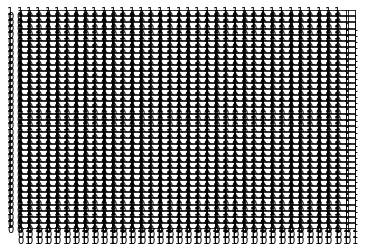

In [316]:
import matplotlib.pyplot as plt
%matplotlib inline 

fig, ax = plt.subplots(ncols=36, nrows=36, figsize=(8, 8))
for i in range(36):
    print(i)
    ax[i//6, i%6].imshow(model.weights[0][:, :, 0, i],cmap='Greys')
    #ax[i].set_title(f"F {i}")
    ax[i].axis('off')

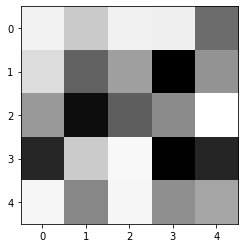

In [330]:
plt.imshow(model.weights[0][:, :, 0, 10],cmap='Greys')

In [61]:
model.layers[2].get_weights()[0].shape

(5, 5, 6, 16)

In [335]:
layer_dict = dict([(layer.name, layer) for layer in model.layers])


In [336]:
layer_dict

{'CONV1': <keras.layers.convolutional.Conv2D at 0x7f35b6195d50>,
 'POOL1': <keras.layers.pooling.MaxPooling2D at 0x7f35b6195f10>,
 'CONV2': <keras.layers.convolutional.Conv2D at 0x7f35b61981d0>,
 'POOL2': <keras.layers.pooling.MaxPooling2D at 0x7f35b6194990>,
 'Flatten': <keras.layers.core.Flatten at 0x7f35b6194750>,
 'FC3': <keras.layers.core.Dense at 0x7f35b6198090>,
 'FC4': <keras.layers.core.Dense at 0x7f35b619cb90>,
 'FC5': <keras.layers.core.Dense at 0x7f35b61a4d10>}

In [343]:
layer_name = 'CONV2'
filter_index = 1

In [344]:
# build a loss function that maximizes the activation
# of the nth filter of the layer considered
layer_output = layer_dict[layer_name].output
loss = K.mean(layer_output[:, :, :, filter_index])
input_img = model.input


In [345]:
loss

<tf.Tensor 'Mean_185:0' shape=() dtype=float32>

In [346]:
# compute the gradient of the input picture wrt this loss
grads = K.gradients(loss, input_img)[0]

# normalization trick: we normalize the gradient
grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)

# this function returns the loss and grads given the input picture
iterate = K.function([input_img], [loss, grads])

In [347]:
import numpy as np
img_width = 28
img_height = 28
step = 2
# we start from a gray image with some noise
input_img_data = np.random.random((1, img_width, img_height, 1)) * 20 + 128.
# run gradient ascent for 20 steps
for i in range(100):
    loss_value, grads_value = iterate([input_img_data])
    input_img_data += grads_value * step
print(loss_value)

0.0


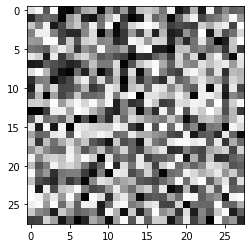

In [348]:
plt.imshow(deprocess_image(input_img_data[0]).reshape(28, 28),cmap='Greys')

In [349]:
layer_name = 'CONV2'


kept_filters = []

In [350]:
for filter_index in range(0, 32):
    # we scan through the first 50 filters
    print('Processing filter %d' % filter_index)
    start_time = time.time()

    # we build a loss function that maximizes the activation
    # of the nth filter of the layer considered
    layer_output = layer_dict[layer_name].output

    loss = K.mean(layer_output[:, :, :, filter_index])

    # we compute the gradient of the input picture wrt this loss
    grads = K.gradients(loss, input_img)[0]

    # normalization trick: we normalize the gradient by its L2 norm
    grads = normalize(grads)

    # this function returns the loss and grads given the input picture
    iterate = K.function([input_img], [loss, grads])

    # step size for gradient ascent
    step = 1.

    # we start from a gray image with some random noise
    input_img_data = np.random.random((1, img_width, img_height, 1))
    input_img_data = (input_img_data - 0.5) * 20 + 128

    # we run gradient ascent for 20 steps
    for i in range(20):
        loss_value, grads_value = iterate([input_img_data])
        input_img_data += grads_value * step

        print('Current loss value:', loss_value)
        if loss_value <= 0.:
            # some filters get stuck to 0, we can skip them
            break

    # decode the resulting input image
    if loss_value > 0:
        img = deprocess_image(input_img_data[0])
        kept_filters.append((img, loss_value))
    end_time = time.time()
    print('Filter %d processed in %ds' % (filter_index, end_time - start_time))

Processing filter 0
Current loss value: 0.0
Filter 0 processed in 0s
Processing filter 1
Current loss value: 0.0
Filter 1 processed in 0s
Processing filter 2
Current loss value: 0.30944765
Current loss value: 0.88627124
Current loss value: 1.5384022
Current loss value: 2.279363
Current loss value: 3.118668
Current loss value: 3.9973907
Current loss value: 4.9691114
Current loss value: 6.0311604
Current loss value: 7.135154
Current loss value: 8.307743
Current loss value: 9.5261755
Current loss value: 10.78129
Current loss value: 12.057592
Current loss value: 13.3582735
Current loss value: 14.677606
Current loss value: 16.033905
Current loss value: 17.406603
Current loss value: 18.784573
Current loss value: 20.161678
Current loss value: 21.543571
Filter 2 processed in 0s
Processing filter 3
Current loss value: 0.0034585847
Current loss value: 0.15843658
Current loss value: 0.4149156
Current loss value: 0.7014448
Current loss value: 1.1913881
Current loss value: 1.7805517
Current loss va

In [291]:
import imageio

In [353]:
n = 2

# the filters that have the highest loss are assumed to be better-looking.
# we will only keep the top 36 filters.
kept_filters.sort(key=lambda x: x[1], reverse=True)
kept_filters = kept_filters[:n * n]

# build a black picture with enough space for
# our 6 x 6 filters of size 28 x 28, with a 5px margin in between
margin = 5
width = n * img_width + (n - 1) * margin
height = n * img_height + (n - 1) * margin
stitched_filters = np.zeros((width, height, 3))

# fill the picture with our saved filters
for i in range(n):
    for j in range(n):
        img, loss = kept_filters[i * n + j]
        stitched_filters[(img_width + margin) * i: (img_width + margin) * i + img_width,
                         (img_height + margin) * j: (img_height + margin) * j + img_height, :] = img

# save the result to disk
imageio.imwrite('lenet_filters_%dx%d.png' % (n, n), stitched_filters, )

Lossy conversion from float64 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


![](lenet_filters_2x2.png)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


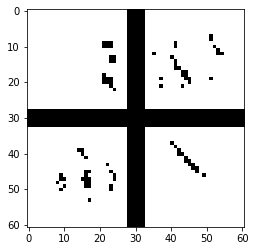

In [354]:
plt.imshow(stitched_filters)

In [356]:
img.shape

(28, 28, 1)